In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('AWS2019.csv', header=None)
df1.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41],
           dtype='int64')

In [3]:
# df = df1.drop(df1.columns[[0]], axis=1)
# df

In [17]:
#df2 = df1.astype(int)
#df2.to_csv('Github2018_int.csv')

In [4]:
features = df1.loc[:, 4:40]

In [5]:
df1.iloc[:, 41].value_counts()

0.0    6719
1.0     481
Name: 41, dtype: int64

In [6]:
X = features
#X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)
X = X.apply(pd.to_numeric, errors='coerce')

In [7]:
def targetify(s):
    if s == 0.0:
        return 0
    else:
        return 1

In [8]:
df1['Target']=df1.loc[:,41].apply(targetify)

In [9]:
 y = df1['Target']

In [10]:
df1["Target"].value_counts()

0    6719
1     481
Name: Target, dtype: int64

In [11]:
X = X.fillna(0)

In [12]:
X = X.apply(pd.to_numeric, errors='coerce')

In [13]:
X = X.fillna(0)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(5760, 37) (5760,)
(1440, 37) (1440,)


In [15]:
y_train.value_counts()

0    5380
1     380
Name: Target, dtype: int64

In [16]:
y_test.value_counts()

0    1339
1     101
Name: Target, dtype: int64

In [17]:
X_train.head()

,4,5,6,7,8,9,10,11,12,13,...,31,32,33,34,35,36,37,38,39,40
6453,1332.0,170.0,2206.0,305.0,5.0,23.0,6.0,2370.0,20616.0,720.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3711.0,2.0,459.0,371.0
4918,1549.0,135.0,2276.0,459.0,5.0,18.0,6.0,4921.0,34654.0,928.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4408.0,2.0,574.0,376.0
636,1320.0,111.0,2591.0,178.0,5.0,18.0,6.0,2559.0,18014.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3538.0,0.0,484.0,374.0
2098,1449.0,160.0,4190.0,467.0,5.0,17.0,6.0,3032.0,55362.0,768.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3985.0,1.0,495.0,382.0
1007,1338.0,103.0,2008.0,167.0,5.0,17.0,6.0,2394.0,25051.0,379.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3678.0,0.0,513.0,374.0


In [18]:
forest = ExtraTreesClassifier(n_estimators=100, random_state=2)

In [19]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=2, verbose=0,
                     warm_start=False)

In [20]:
importances = forest.feature_importances_

In [21]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [22]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 34: 38 (0.090312)
2. feature 0: 4 (0.081879)
3. feature 9: 13 (0.079726)
4. feature 35: 39 (0.079674)
5. feature 1: 5 (0.078736)
6. feature 33: 37 (0.077462)
7. feature 36: 40 (0.072590)
8. feature 2: 6 (0.072543)
9. feature 7: 11 (0.071766)
10. feature 8: 12 (0.070284)
11. feature 11: 15 (0.070032)
12. feature 3: 7 (0.069315)
13. feature 6: 10 (0.018673)
14. feature 5: 9 (0.013442)
15. feature 12: 16 (0.013382)
16. feature 10: 14 (0.013037)
17. feature 20: 24 (0.006937)
18. feature 4: 8 (0.005598)
19. feature 19: 23 (0.004812)
20. feature 21: 25 (0.003972)
21. feature 22: 26 (0.003094)
22. feature 32: 36 (0.001003)
23. feature 18: 22 (0.000923)
24. feature 17: 21 (0.000404)
25. feature 31: 35 (0.000400)
26. feature 30: 34 (0.000002)
27. feature 16: 20 (0.000001)
28. feature 29: 33 (0.000000)
29. feature 13: 17 (0.000000)
30. feature 28: 32 (0.000000)
31. feature 15: 19 (0.000000)
32. feature 23: 27 (0.000000)
33. feature 24: 28 (0.000000)
34. feature 25: 29

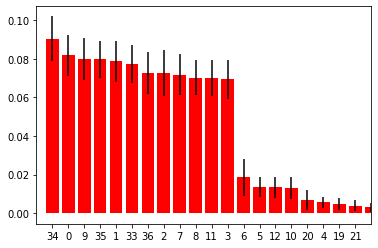

In [23]:
# Plot the top x feature importances of the forest
top_x = 20

plt.figure()
# plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(top_x), indices)
plt.xlim([-1, top_x])
plt.show()

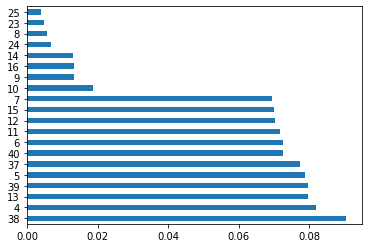

In [24]:
plt = pd.Series(forest.feature_importances_, index=X_train.columns).nlargest(top_x).plot(kind='barh')
fig = plt.get_figure()
fig.savefig('figure.jpg', bbox_inches = "tight")